## Part 1: Parse the DICOM Images and Contour Files
* TBD
* In order to integrate with your production code base, I tucked the provided functions into several classes, i.e. IContourDataParser, DicomParser, MRIDataLoader.

## Part 2: Model Training Pipeline
* I didn't change much from part 1. First, I extended the MRIDataLoader to take another initial paramter to determine minibatch size. Then, I added code that first requires the user to `load()` the data before fetching it via minibatches. 
* I verified that the pipleine is working by (TBD).
* I would probably rewrite my contour file parser so that it could properly handle both i-contour and o-contour files.

In [1]:
from parsing import MRIDataLoader
import matplotlib.pyplot as plt

In [2]:
# Load Data
dataLoader = MRIDataLoader(
    './final_data/contourfiles',
    './final_data/dicoms',
    './final_data/link.csv',
    8
)
dataLoader.load()

In [12]:
# Plot Minibatch
def plot_minibatches(imgs, contours):
    for idx in range(len(imgs)):
        img = imgs[idx]
        contour = contours[idx]

        fig = plt.figure()
        a = fig.add_subplot(1, 2, 1)
        plt.imshow(img['pixel_data'])
        a.set_title('DICOM Image')
        
        a = fig.add_subplot(1, 2, 2)
        plt.imshow(contour.reshape(256, 256))
        a.set_title('Contour Mask')
        
        plt.show()
        

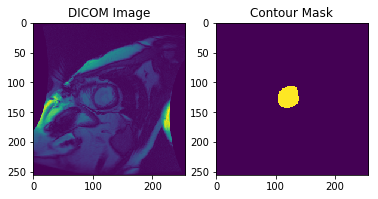

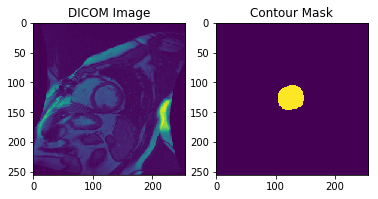

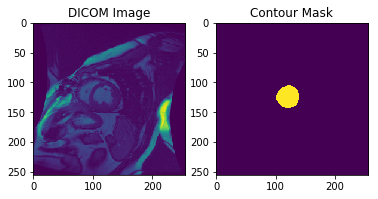

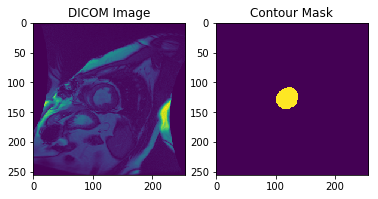

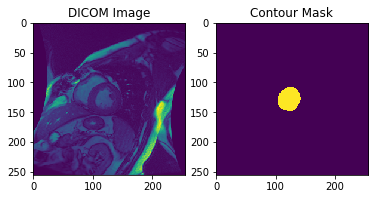

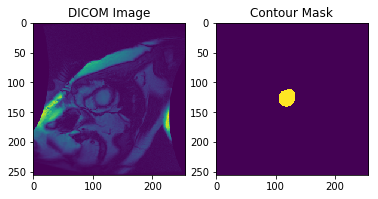

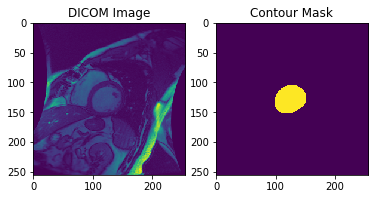

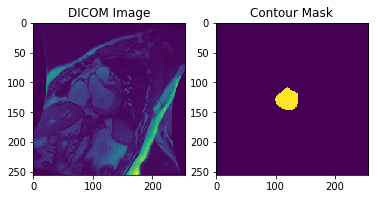

In [16]:
# Minibatch 1
contour_masks, imgs = dataLoader.fetch_minibatch()
plot_minibatches(imgs, contour_masks)